In [ ]:
!pip install keras_preprocessing

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, SimpleRNN, Dense


features = 2000
embedding = 128
hidden = 64
max_len = 50

# Build the model
model = Sequential()
model.add(Embedding(features, embedding, input_length=max_len))
model.add(Bidirectional(SimpleRNN(hidden)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\saill\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
import warnings
warnings.filterwarnings('ignore')
from keras.datasets import imdb
from keras_preprocessing.sequence import pad_sequences

features = 2000
len = 50
(X_train, y_train),\
(X_test, y_test) = imdb.load_data(num_words=features)

X_train = pad_sequences(X_train, maxlen=len)
X_test = pad_sequences(X_test, maxlen=len)


In [ ]:
batch_size = 32
epochs = 5

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test))


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.6502 - loss: 0.6018 - val_accuracy: 0.7856 - val_loss: 0.4603
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.8171 - loss: 0.4145 - val_accuracy: 0.7661 - val_loss: 0.4817
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.8457 - loss: 0.3542 - val_accuracy: 0.7871 - val_loss: 0.4686
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.8942 - loss: 0.2650 - val_accuracy: 0.7558 - val_loss: 0.5442
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.9283 - loss: 0.1847 - val_accuracy: 0.7542 - val_loss: 0.6364


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)


782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7496 - loss: 0.6506
Test accuracy: 0.7541999816894531


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.9525 - loss: 0.1305 - val_accuracy: 0.7502 - val_loss: 0.7135
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.9694 - loss: 0.0862 - val_accuracy: 0.7564 - val_loss: 0.8900
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.9786 - loss: 0.0637 - val_accuracy: 0.7520 - val_loss: 0.9952
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.9844 - loss: 0.0480 - val_accuracy: 0.7012 - val_loss: 1.1685
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.9822 - loss: 0.0544 - val_accuracy: 0.7414 - val_loss: 1.1958


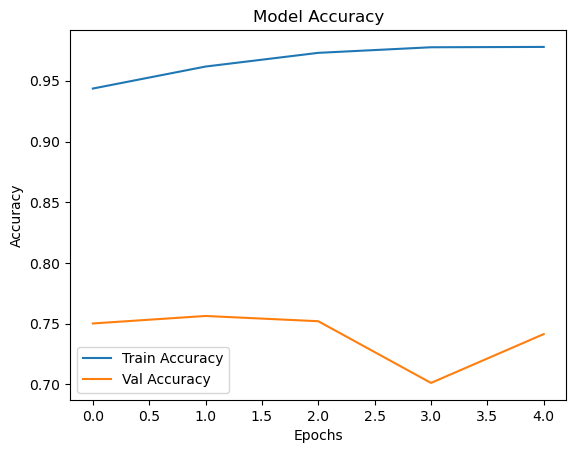

In [ ]:
import matplotlib.pyplot as plt

# Train and store history
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=5,
    validation_data=(X_test, y_test)
)

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
